In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/AGGLIO
from agglio_lib import *

/content/drive/.shortcut-targets-by-id/1zpCINc6DipbxhAZvGb3FthCGZKlshpbu/AGGLIO


In [4]:
n = 1000
d = 50
w_radius = 10
wAst = np.random.randn(d,1)
X = getData(0, 1, n, d)/np.sqrt(d)

w0 =w_radius*np.random.randn(d,1)/np.sqrt(d)
ipAst = np.matmul(X, wAst)
val_ind=np.random.randint(n, size=int(0.20*n))
noise_list=[0.1, 0.2, 0.3, 0.4, 0.5 ]

In [5]:
#AGGLIO-GD
l2_agd=[]
l2_agsgd=[]

for sigma in noise_list:
    y = sigmoid_noisy_pre(ipAst, sigma_noise=sigma)
    
    #AGGLIO-GD
    alpha_range = np.linspace(start=1, stop=d*5, num=10).tolist()
    B_init_range= np.power(10.0, [-1, -2, -3, -4]).tolist()
    B_step_range =np.linspace(start=1.01, stop=2, num=5).tolist()
    parameters = dict(alpha = alpha_range, B_init=B_init_range, B_step=B_step_range )
    cv = ShuffleSplit( n_splits = 1, test_size = 0.3, random_state = 42 )
    grid = GridSearchCV( AG_GD( ), param_grid=parameters, refit = False, cv=cv) # verbose=3
    grid.fit( X, y.ravel(), w_init=w0.ravel(), w_star=wAst.ravel())
    best = grid.best_params_
    print("The best parameters for AGGILIO_GD are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
    agd = AG_GD(alpha= best["alpha"], B_init=best['B_init'], B_step=best['B_step'] )
    agd.fit( X, y.ravel(), w_init = w0.ravel(), w_star = wAst.ravel(), max_iter=600 )
    l2_agd.append(agd.distVals[-1])
    
    #AGGLIO-SGD
    alpha_range = np.linspace(start=1, stop=d*5, num=5).tolist()
    B_init_range= np.power(10.0, [-1, -2, -3, -4]).tolist()
    B_step_range =np.linspace(start=1.01, stop=2, num=5).tolist()
    parameters = dict(alpha = alpha_range, B_init=B_init_range, B_step=B_step_range )
    cv = ShuffleSplit( n_splits = 1, test_size = 0.3, random_state = 42 )
    grid = GridSearchCV( AG_SGD( ), param_grid=parameters, refit = False, cv=cv) # verbose=3
    grid.fit( X, y.ravel(), w_init=w0.ravel(), w_star=wAst.ravel(), minibatch_size=200)
    best = grid.best_params_
    print("The best parameters for AGGILIO_SGD are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
    agsgd = AG_SGD(alpha= best["alpha"], B_init=best['B_init'], B_step=best['B_step'] )    
    agsgd.fit( X, y.ravel(), w_init = w0.ravel(), w_star = wAst.ravel(), max_iter=600, minibatch_size=200 )
    l2_agsgd.append(agsgd.distVals[-1])

The best parameters for AGGILIO_GD are {'B_init': 0.0001, 'B_step': 1.2575, 'alpha': 111.66666666666667} with a score of -0.00
The best parameters for AGGILIO_SGD are {'B_init': 0.001, 'B_step': 2.0, 'alpha': 250.0} with a score of -0.00
The best parameters for AGGILIO_GD are {'B_init': 0.1, 'B_step': 1.01, 'alpha': 28.666666666666668} with a score of -0.00
The best parameters for AGGILIO_SGD are {'B_init': 0.1, 'B_step': 1.2575, 'alpha': 125.5} with a score of -0.00
The best parameters for AGGILIO_GD are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 28.666666666666668} with a score of -0.00
The best parameters for AGGILIO_SGD are {'B_init': 0.0001, 'B_step': 1.505, 'alpha': 250.0} with a score of -0.00
The best parameters for AGGILIO_GD are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 28.666666666666668} with a score of -0.01
The best parameters for AGGILIO_SGD are {'B_init': 0.1, 'B_step': 1.7525, 'alpha': 125.5} with a score of -0.01
The best parameters for AGGILIO_GD are {'B_init': 0.

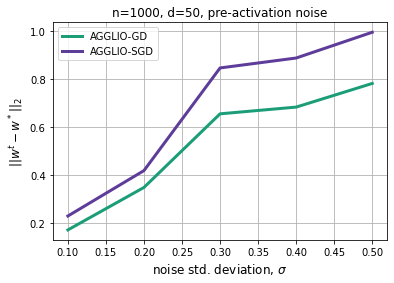

In [6]:
plt.plot(noise_list, l2_agd, label='AGGLIO-GD', color='#1b9e77', linewidth=3)
plt.plot(noise_list, l2_agsgd, label='AGGLIO-SGD', color='#5e3c99', linewidth=3)

plt.legend()
plt.ylabel("$||w^t-w^*||_2$",fontsize=12)
plt.xlabel("noise std. deviation, $\sigma$",fontsize=12)
plt.grid()
plt.title(r"n=1000, d=50, pre-activation noise" )
plt.savefig('pre_noise_abliation.pdf', dpi=300)
plt.show()